In [91]:
import pandas as pd
import numpy as np
import missingno as msno
import os
import matplotlib.pyplot as plt
import pickle

In [92]:
print(os.getcwd())
path = "FINAL-Cybersecurity-employee_September-30-2024_21_23.xlsx"
df = pd.read_excel(path)

/home/ketamine/Buas/Year2/2024-25a-fai2-adsai-group-cybersecurity-4/Niels_analysis


In [93]:
print(df.columns)
print(df.iloc[0])
questions = list(df.iloc[0])

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'InformedConsent', 'Prolific',
       'Overall_knowledge', 'importance_role', 'industry_regulations',
       'guidelines', 'awareness', 'measures', 'measures_11_TEXT',
       'report_issue', 'Q4', 'review_policies', 'concern', 'Confidence',
       'confident_prevent', 'knowledge', 'maintain_tools', 'rank_tools_1',
       'rank_tools_2', 'rank_tools_3', 'rank_tools_4', 'rank_tools_5',
       'antivirus_scans', 'Considerations', 'AI_in_cybersecurity', 'AI usage',
       'ai_accuracy', 'Bias_security', 'wrong_identification', 'Worst_Outcome',
       'Trust in AI', 'Trust in AI_5_TEXT', 'Review_frequency',
       'location_policies', 'Consequences', 'Effectiveness', 'rank_

In [94]:
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Age,nationality,Gender,Gender_4_TEXT,sector,Company Size,department,Years of Experience,questions,PROLIFIC_PID
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,How old are you?,What is your nationality?,How do you describe yourself? - Selected Choice,How do you describe yourself? - Prefer to self...,what sector do you work in?,How many employees does your company have?,What department do you work in.,How many years of experience do you have worki...,How long has your current company been operating?,PROLIFIC_PID
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/Ber...","{""ImportId"":""endDate"",""timeZone"":""Europe/Berlin""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID1216710137_TEXT""}","{""ImportId"":""QID66_TEXT""}","{""ImportId"":""QID1216710138""}","{""ImportId"":""QID1216710138_4_TEXT""}","{""ImportId"":""QID68""}","{""ImportId"":""QID1216710165""}","{""ImportId"":""QID69""}","{""ImportId"":""QID1216710166""}","{""ImportId"":""QID78""}","{""ImportId"":""PROLIFIC_PID""}"
2,2024-09-30 16:16:37,2024-09-30 16:21:16,IP Address,94.5.23.174,100,278,True,2024-09-30 16:21:17,R_2re2v1Atwc4KJ8X,NaN,...,32,British,Male,NaN,Information Technology (IT),100+,IT & Engineering,3-5 years,More than 20 years,66fa6955223d6a12ab0abe94
3,2024-09-30 16:16:35,2024-09-30 16:22:03,IP Address,197.229.7.34,100,328,True,2024-09-30 16:22:04,R_8aJQo0MJP1YNhgl,NaN,...,31,South African,Female,NaN,Sports and Recreation,2024-01-10 00:00:00,Other,less than 1 year,Less than 1 year,611ec49716b95cd9e2e981b4
4,2024-09-30 16:17:53,2024-09-30 16:22:13,IP Address,149.90.50.165,100,260,True,2024-09-30 16:22:14,R_8Y3dYStYrUx80xx,NaN,...,23,Portuguese,Female,NaN,Healthcare and Pharmaceuticals,51-100,Operations & Supply Chain,1-3 years,More than 20 years,660c0d70a8f60acced0c8cc8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2024-09-30 16:21:02,2024-09-30 16:49:22,IP Address,85.27.8.212,100,1699,True,2024-09-30 16:49:22,R_2whK4ylPHY8U06L,NaN,...,25,French,Female,NaN,Media and Entertainment,100+,Sales & Marketing,less than 1 year,5 - 10 years,60fd1df8bc352e3fec9531e7
152,2024-09-30 16:30:29,2024-09-30 16:54:48,IP Address,78.131.66.9,100,1458,True,2024-09-30 16:54:48,R_2WHDxMHPCYOGlwJ,NaN,...,23,Hungarian,Male,NaN,Information Technology (IT),100+,IT & Engineering,3-5 years,10 - 20 years,60f43127b2b2e32120869426
153,2024-09-30 16:19:57,2024-09-30 16:56:01,IP Address,216.21.164.204,100,2163,True,2024-09-30 16:56:02,R_6K1vw6pqYkrPYxb,NaN,...,44,American,Female,NaN,Finance and Banking,2024-11-25 00:00:00,Finance & Accounting,more than 10 years,More than 20 years,614b2994a6bd480cee7222dd
154,2024-09-30 17:17:55,2024-09-30 17:28:45,IP Address,87.110.151.142,100,649,True,2024-09-30 17:28:46,R_2kTAwuQXqM5qXqV,NaN,...,24,Latvian,Female,NaN,Education,26-50,Other,less than 1 year,More than 20 years,65be552ceed6a0595fa1feb5


In [95]:
df.drop([0,1], inplace=True)

In [96]:
def msno_matrix(df):
    num_cols = 20

    for i in range(0, df.shape[1], num_cols):
        subset = df.iloc[:, i:i + num_cols]  # Get a chunk of columns
        plt.figure(figsize=(20, 8))  # Adjust the size as needed
        msno.matrix(subset)
        plt.title(f'Visualization of columns {i+1} to {min(i+num_cols, df.shape[1])}')
        plt.show()

<Figure size 2000x800 with 0 Axes>

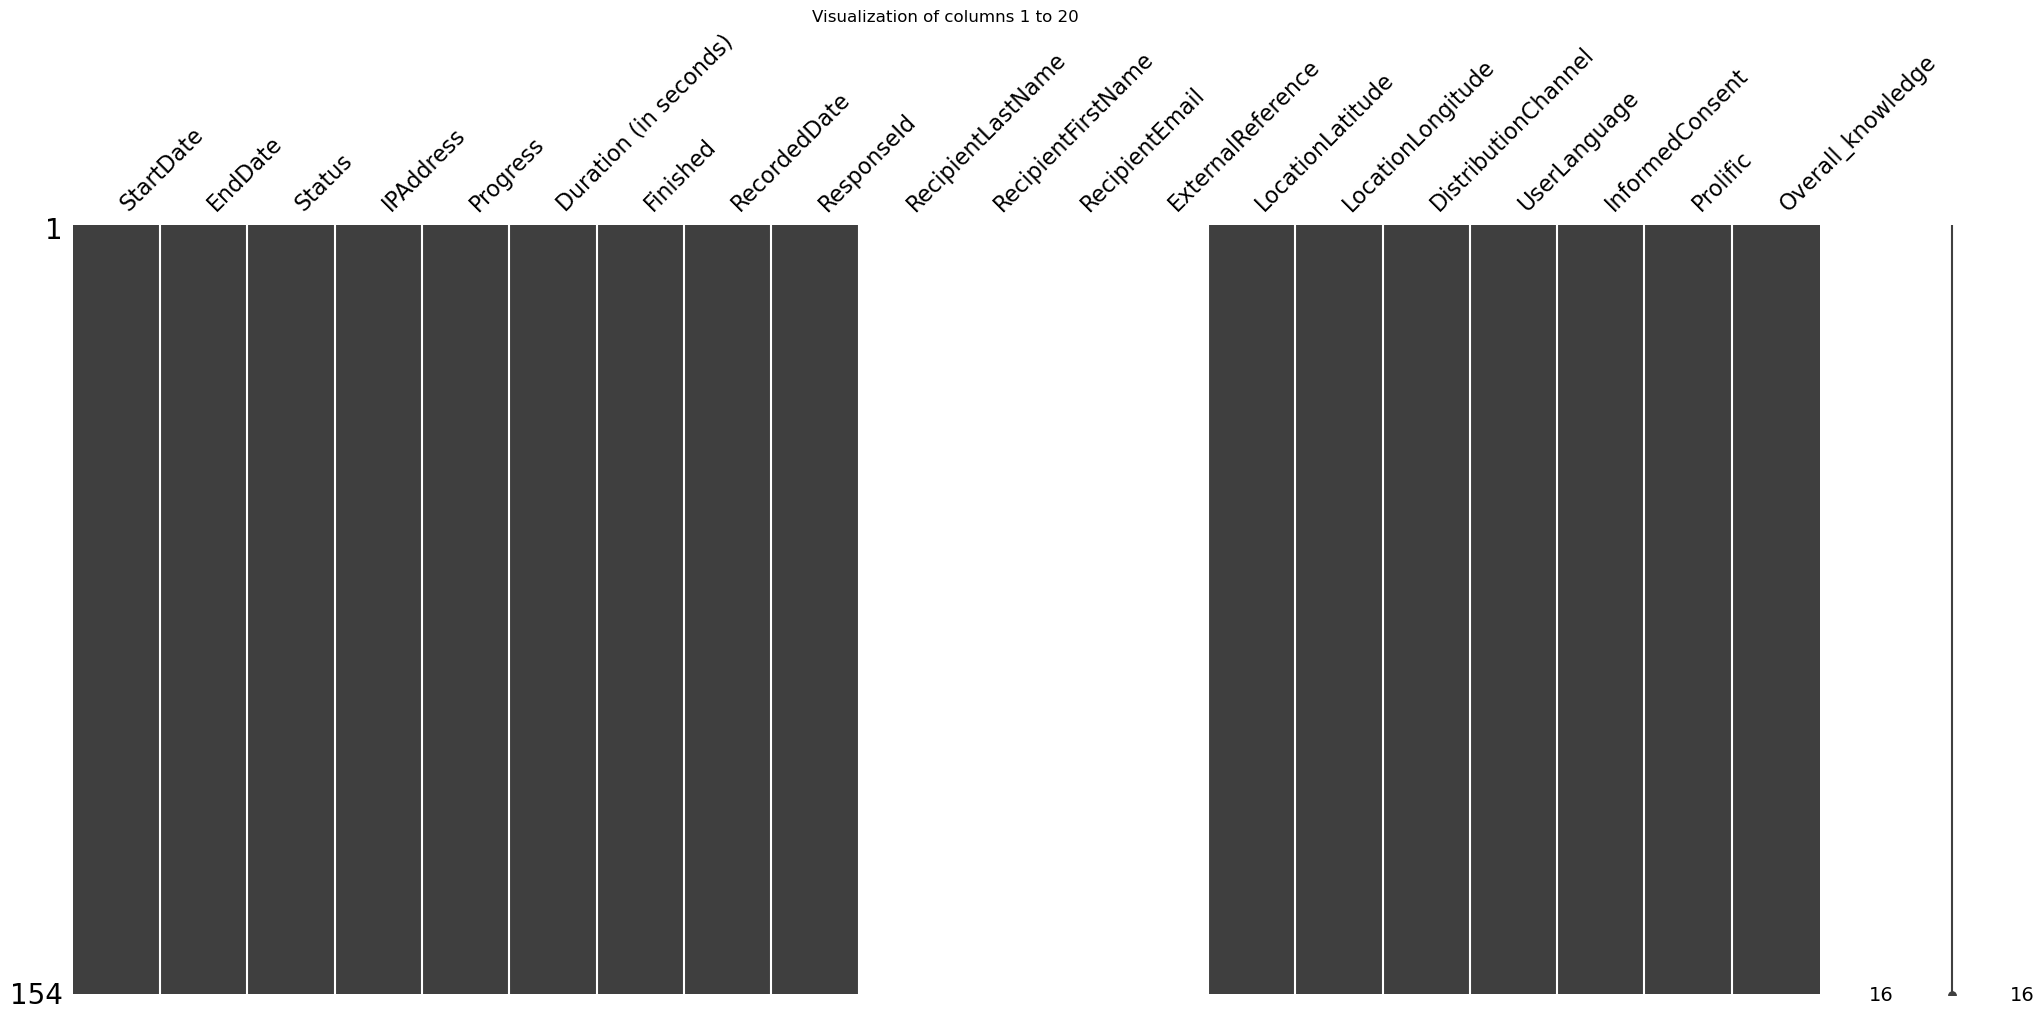

<Figure size 2000x800 with 0 Axes>

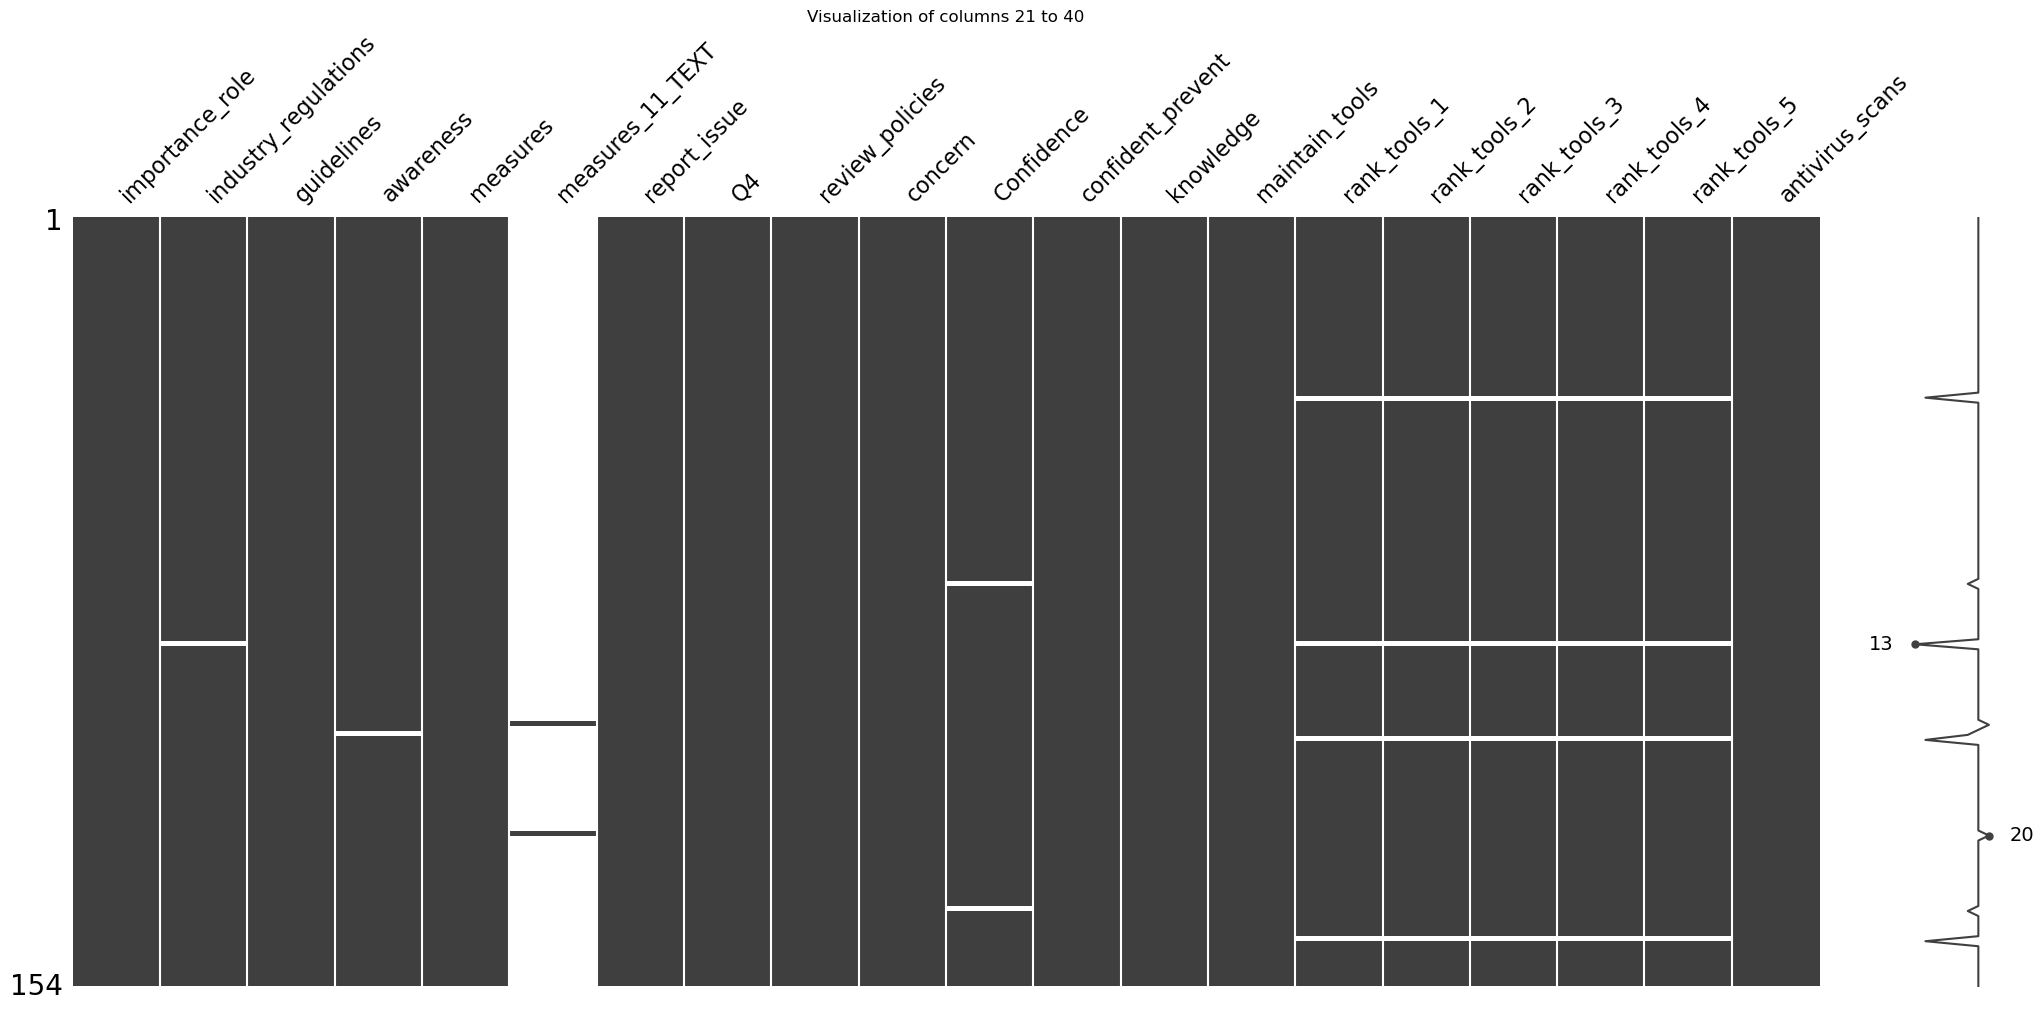

<Figure size 2000x800 with 0 Axes>

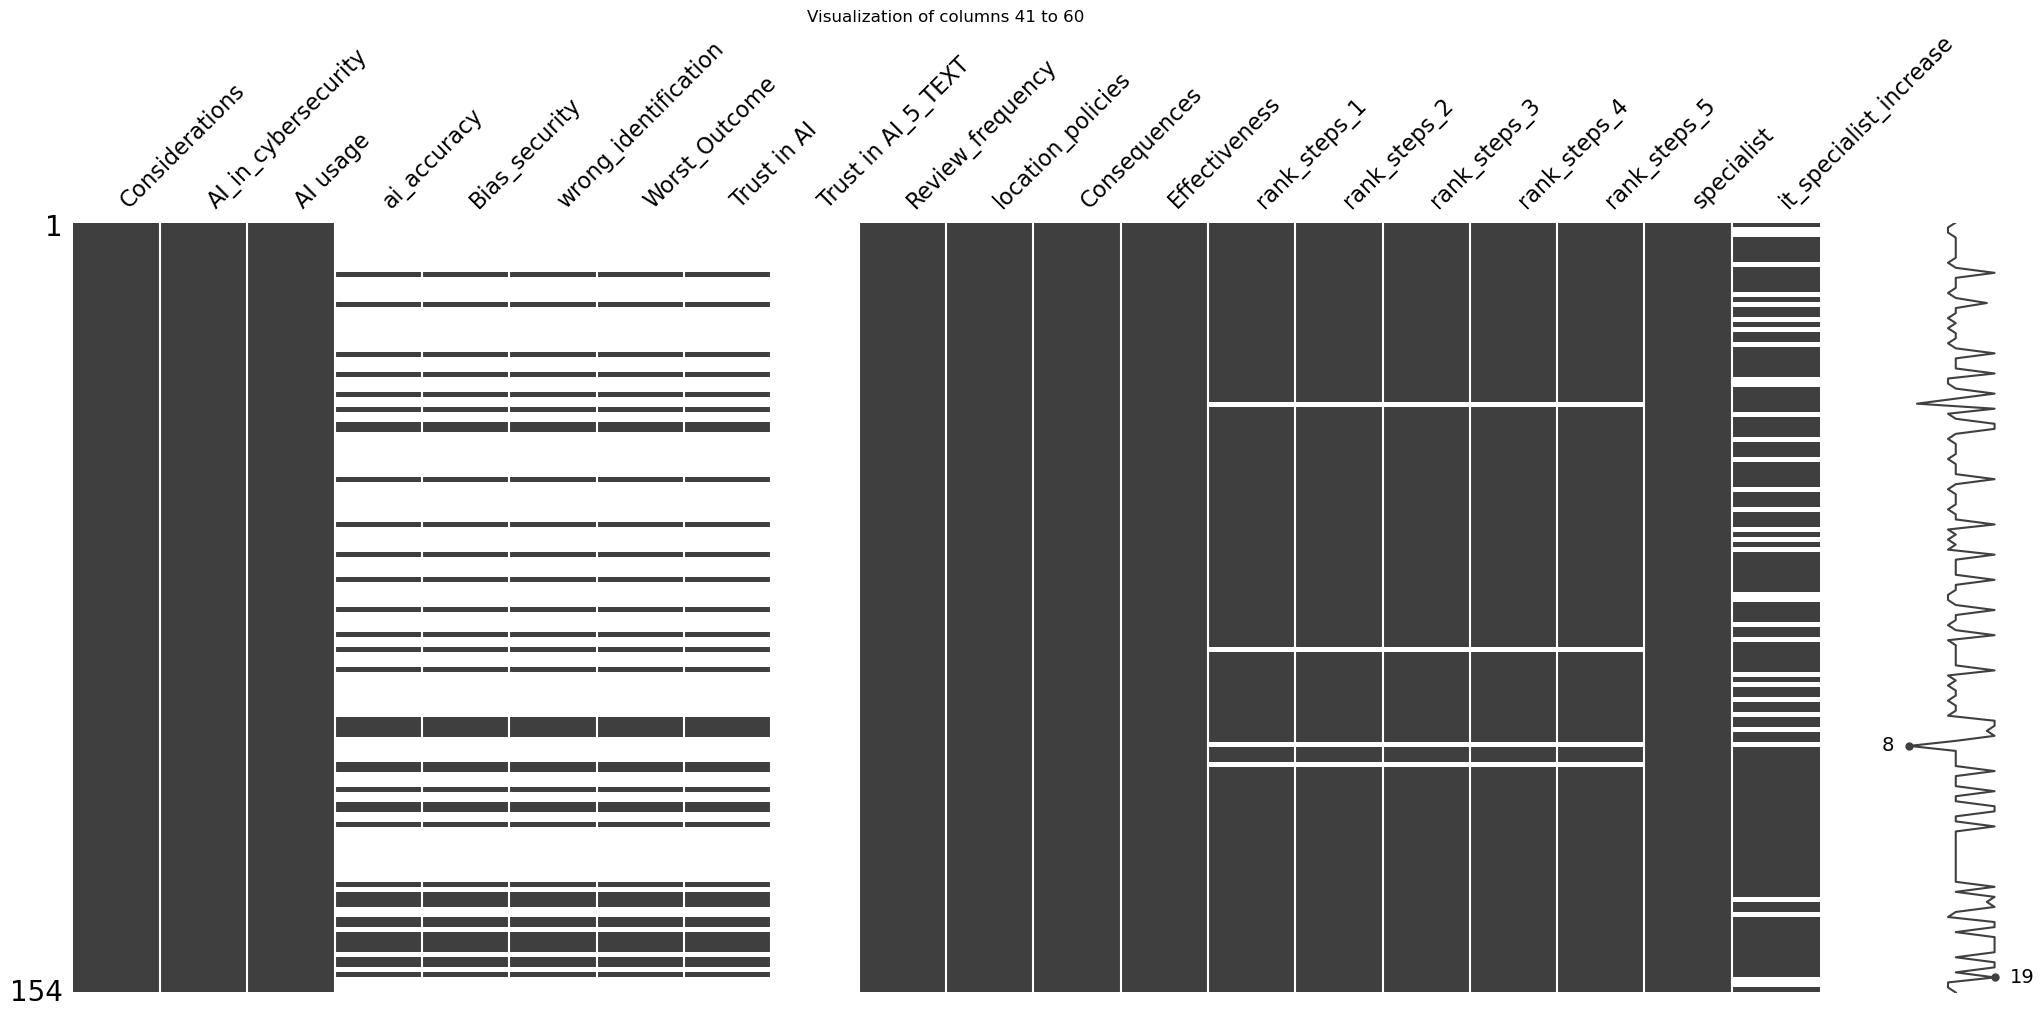

<Figure size 2000x800 with 0 Axes>

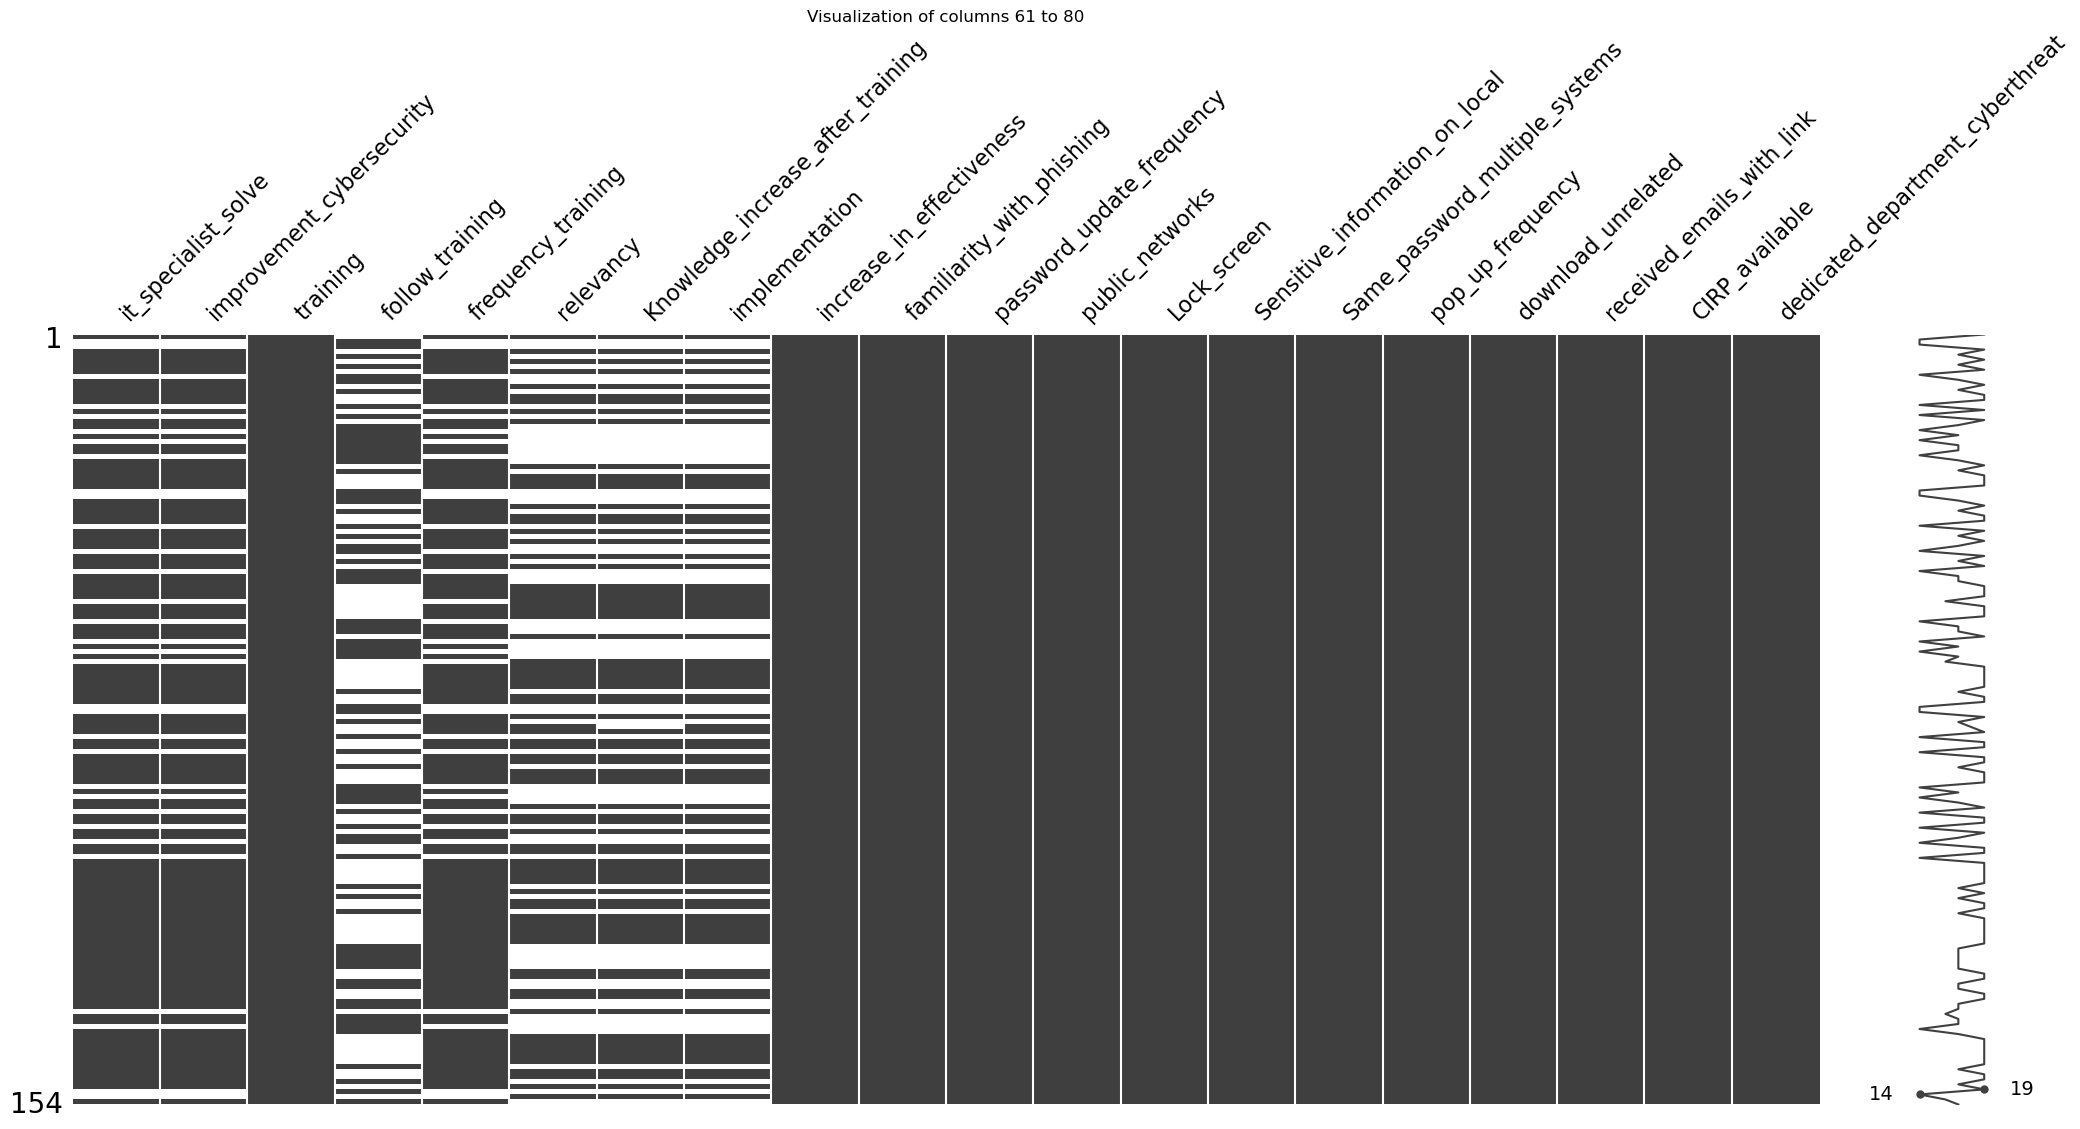

<Figure size 2000x800 with 0 Axes>

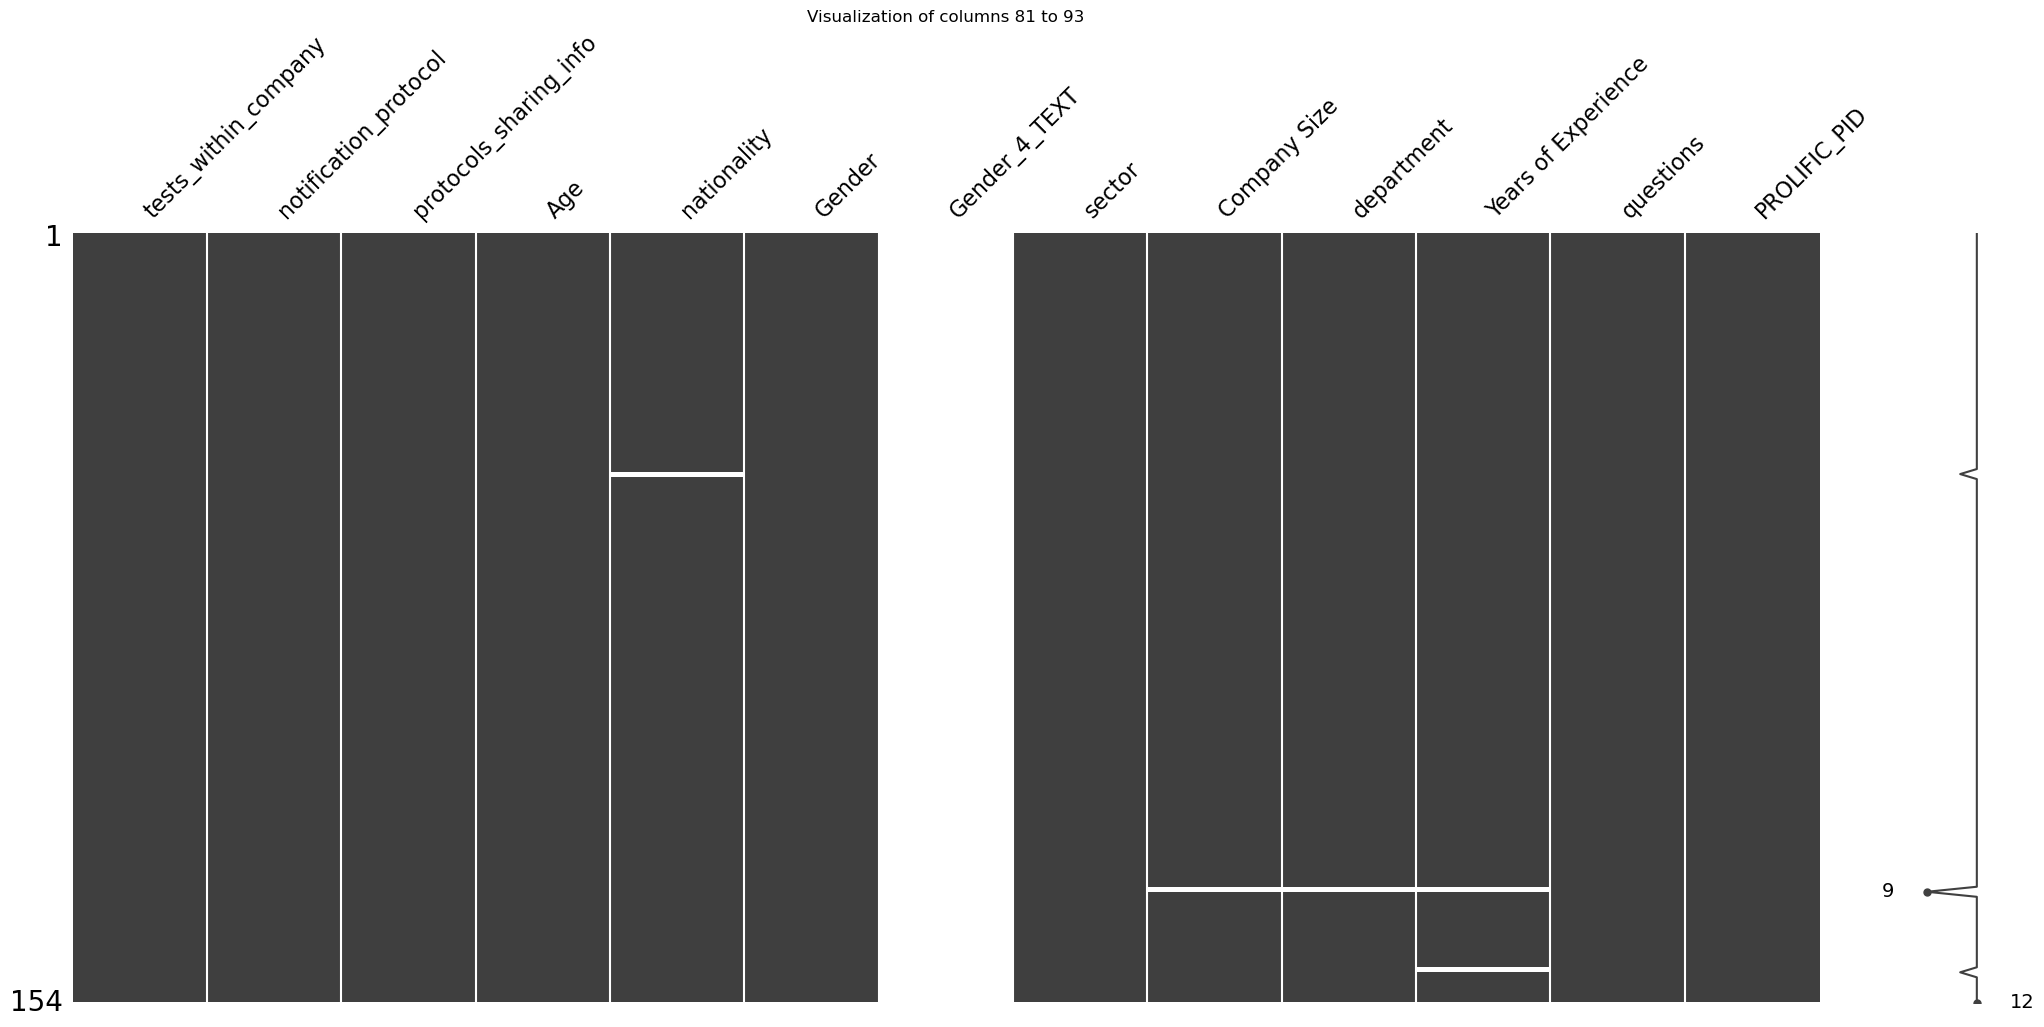

In [97]:
msno_matrix(df)

In [98]:
to_remove = ["RecipientLastName", "RecipientFirstName", "RecipientEmail", "ExternalReference", "Trust in AI_5_TEXT", "Gender_4_TEXT"]
columns = list(df.columns)
indices = [columns.index(x) for x in to_remove]

print(to_remove, "\n", columns, "\n", indices)

for index in sorted(indices, reverse=True):
    del questions[index]
    del columns[index]
    
df.drop(to_remove, axis=1, inplace=True)

['RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'Trust in AI_5_TEXT', 'Gender_4_TEXT'] 
 ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'InformedConsent', 'Prolific', 'Overall_knowledge', 'importance_role', 'industry_regulations', 'guidelines', 'awareness', 'measures', 'measures_11_TEXT', 'report_issue', 'Q4', 'review_policies', 'concern', 'Confidence', 'confident_prevent', 'knowledge', 'maintain_tools', 'rank_tools_1', 'rank_tools_2', 'rank_tools_3', 'rank_tools_4', 'rank_tools_5', 'antivirus_scans', 'Considerations', 'AI_in_cybersecurity', 'AI usage', 'ai_accuracy', 'Bias_security', 'wrong_identification', 'Worst_Outcome', 'Trust in AI', 'Trust in AI_5_TEXT', 'Review_frequency', 'location_policies', 'Consequence

<Figure size 2000x800 with 0 Axes>

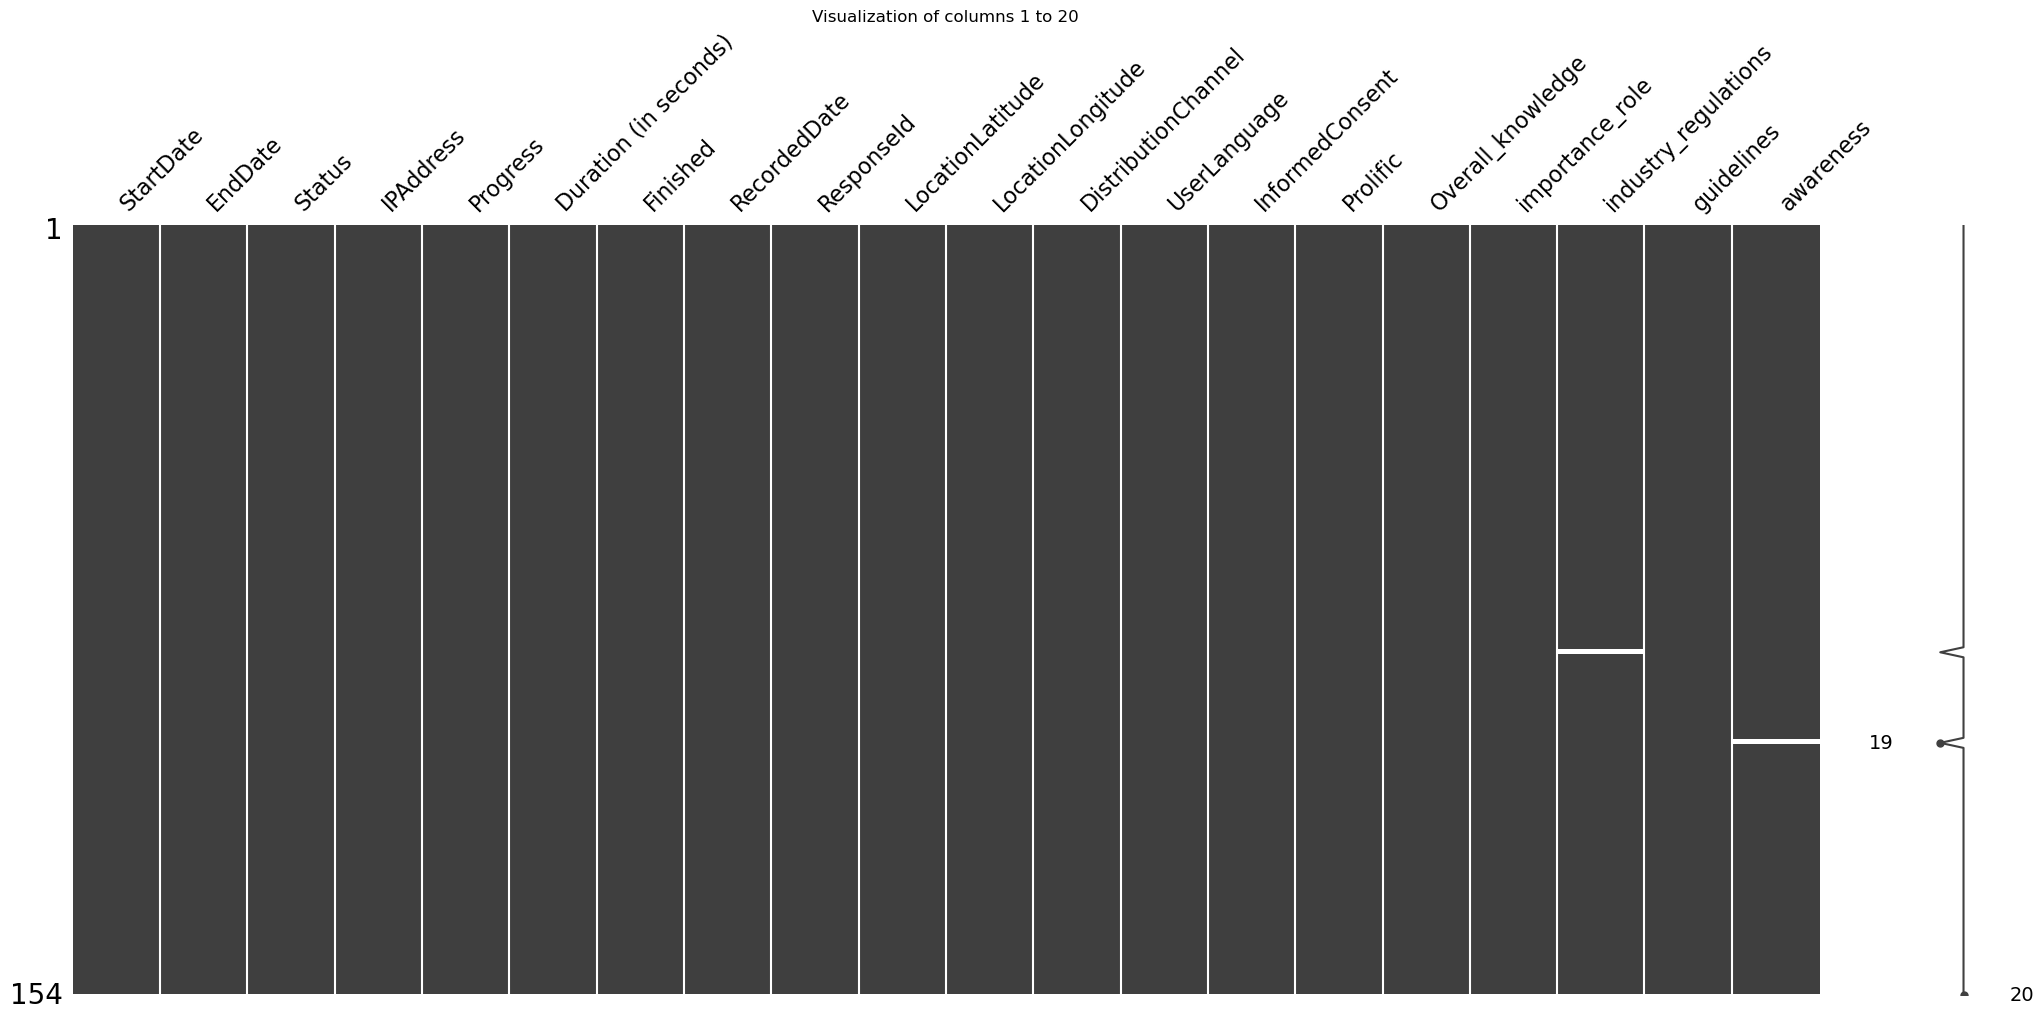

<Figure size 2000x800 with 0 Axes>

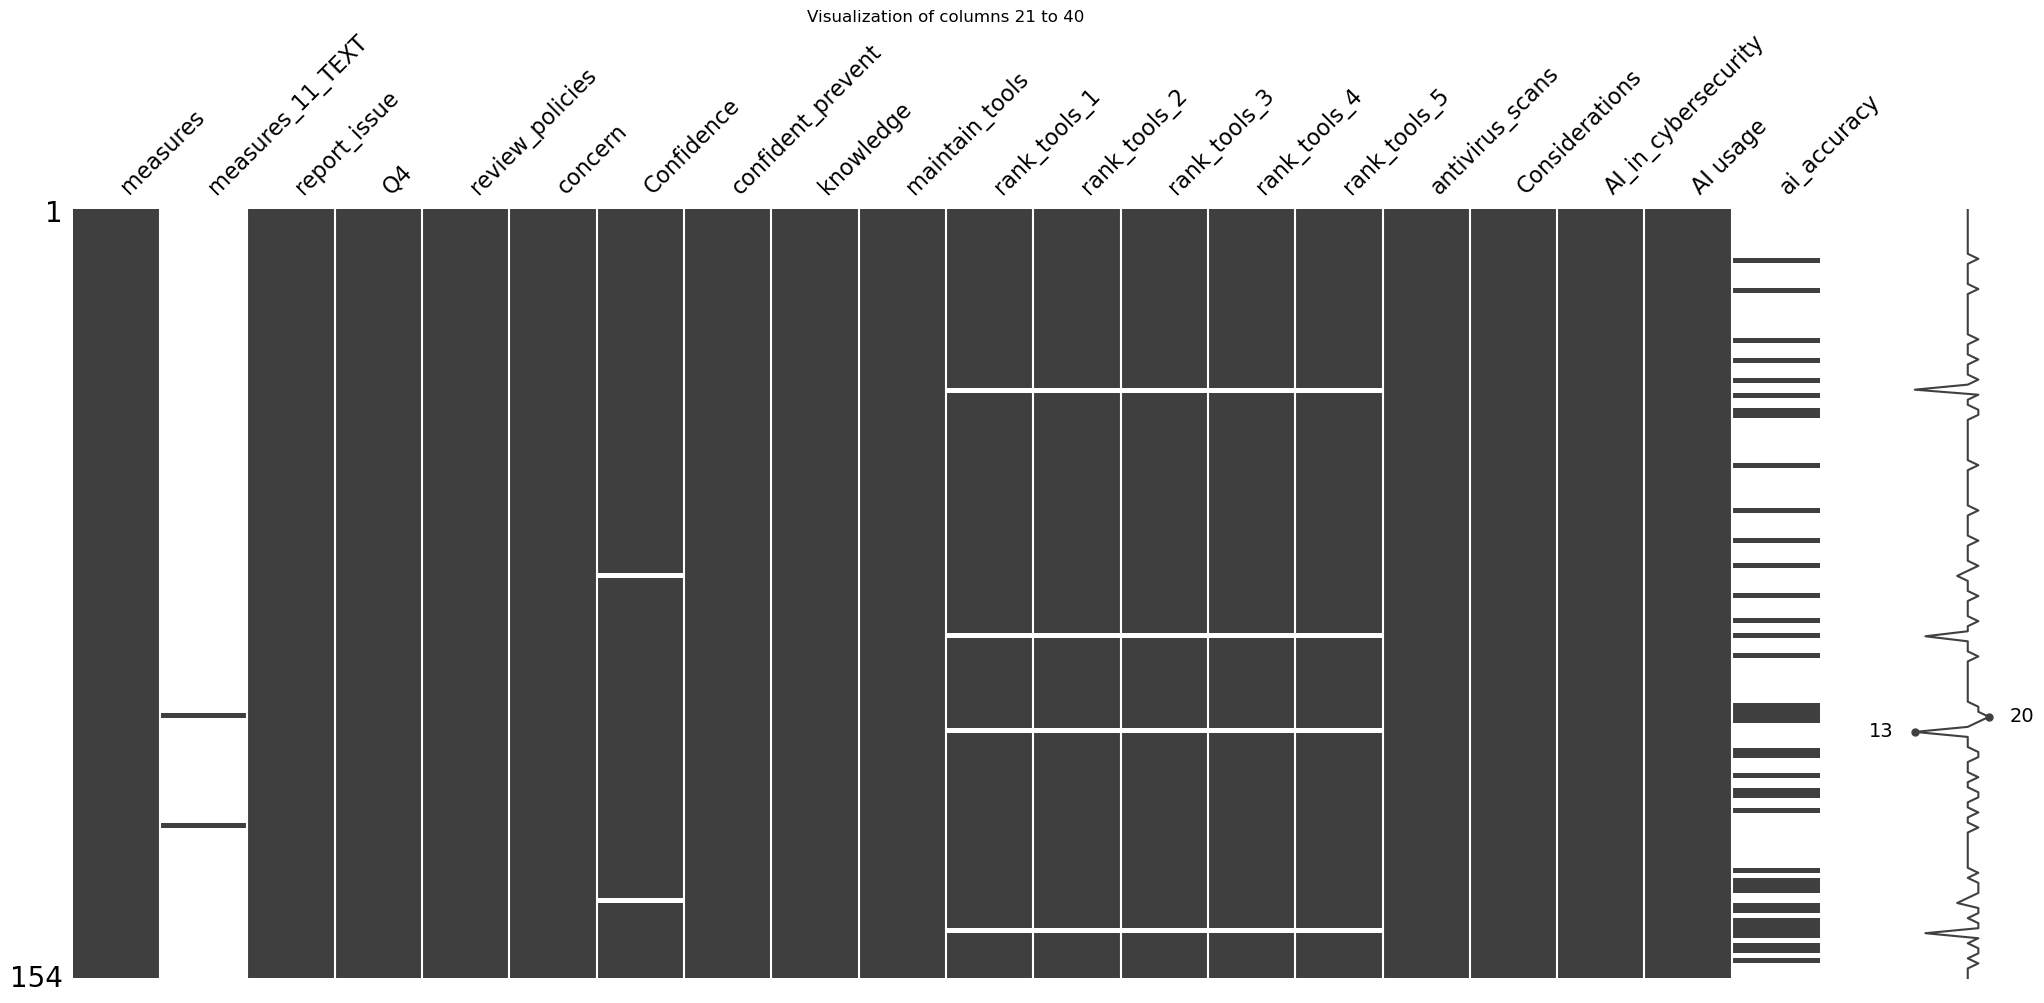

<Figure size 2000x800 with 0 Axes>

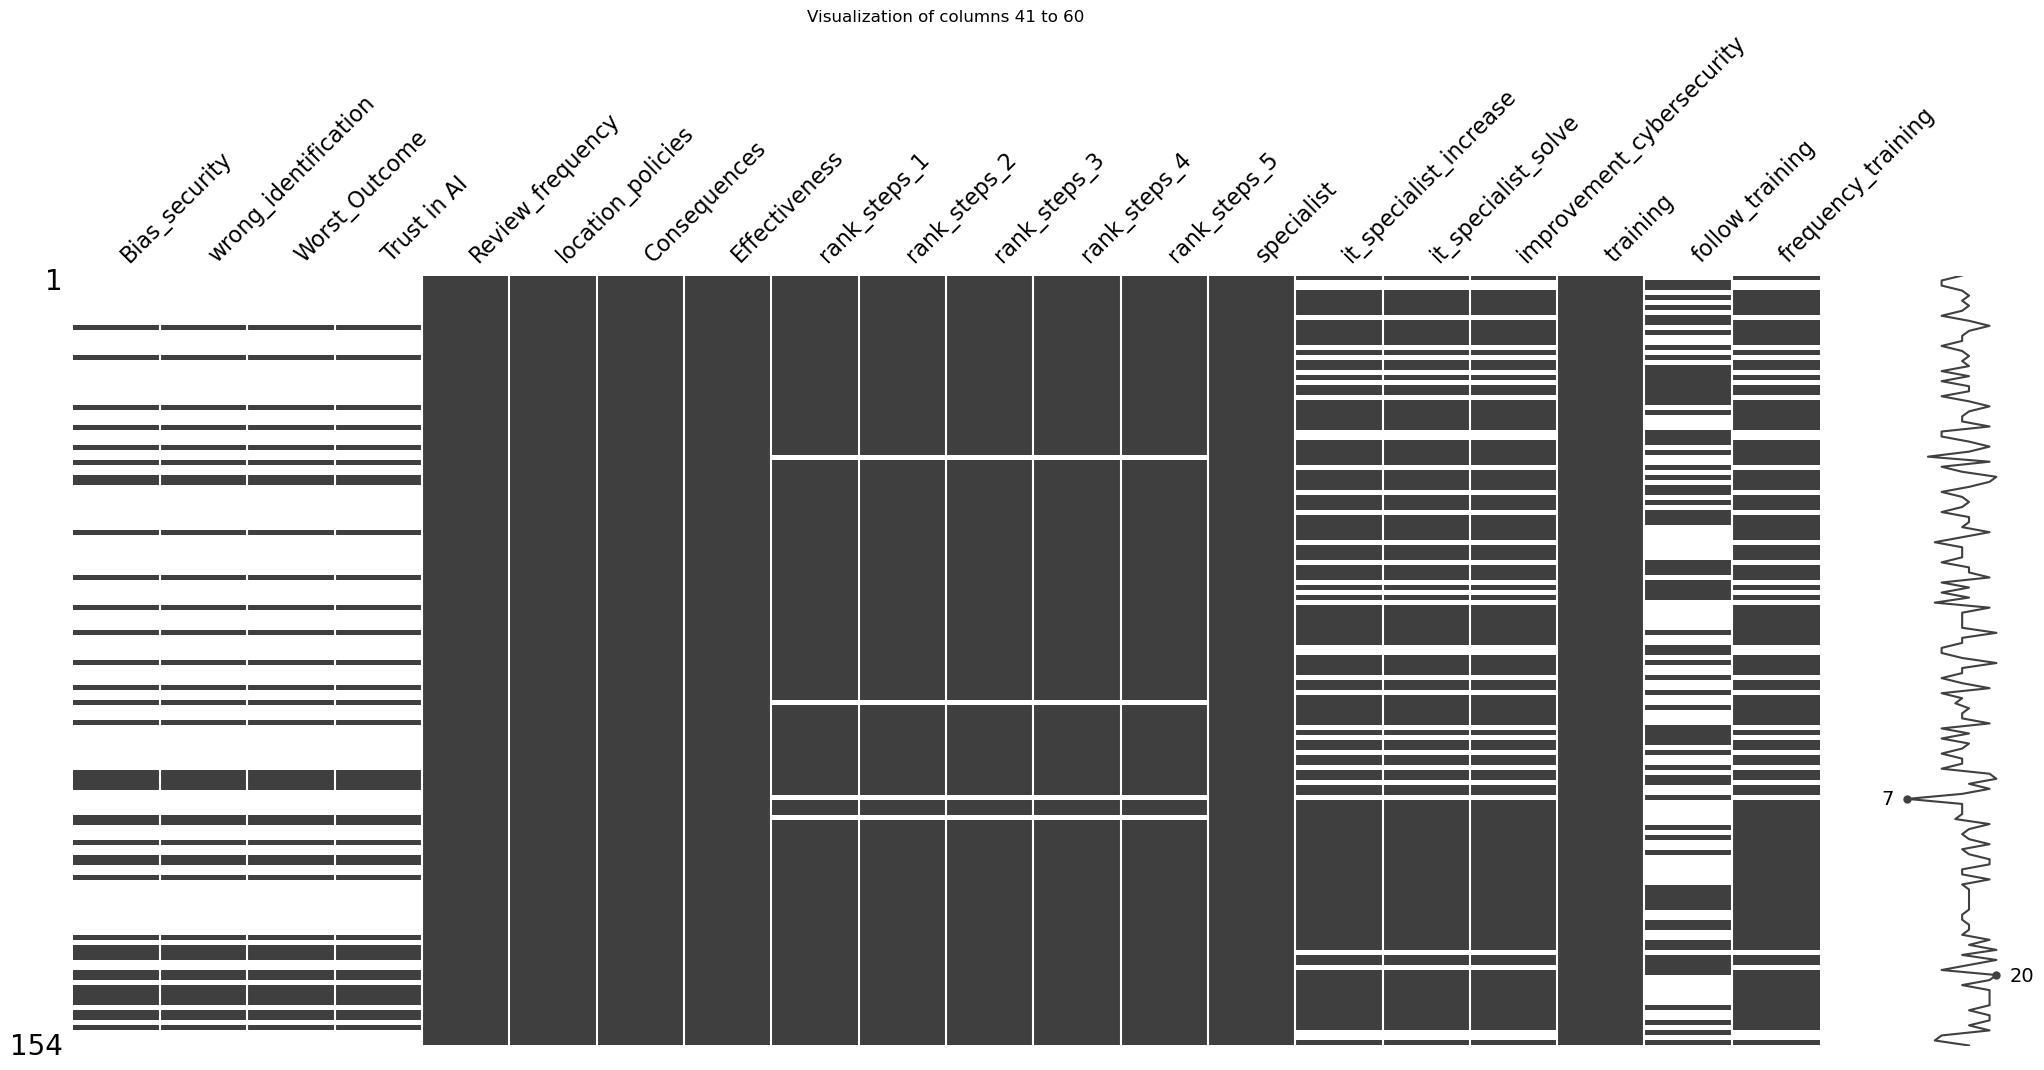

<Figure size 2000x800 with 0 Axes>

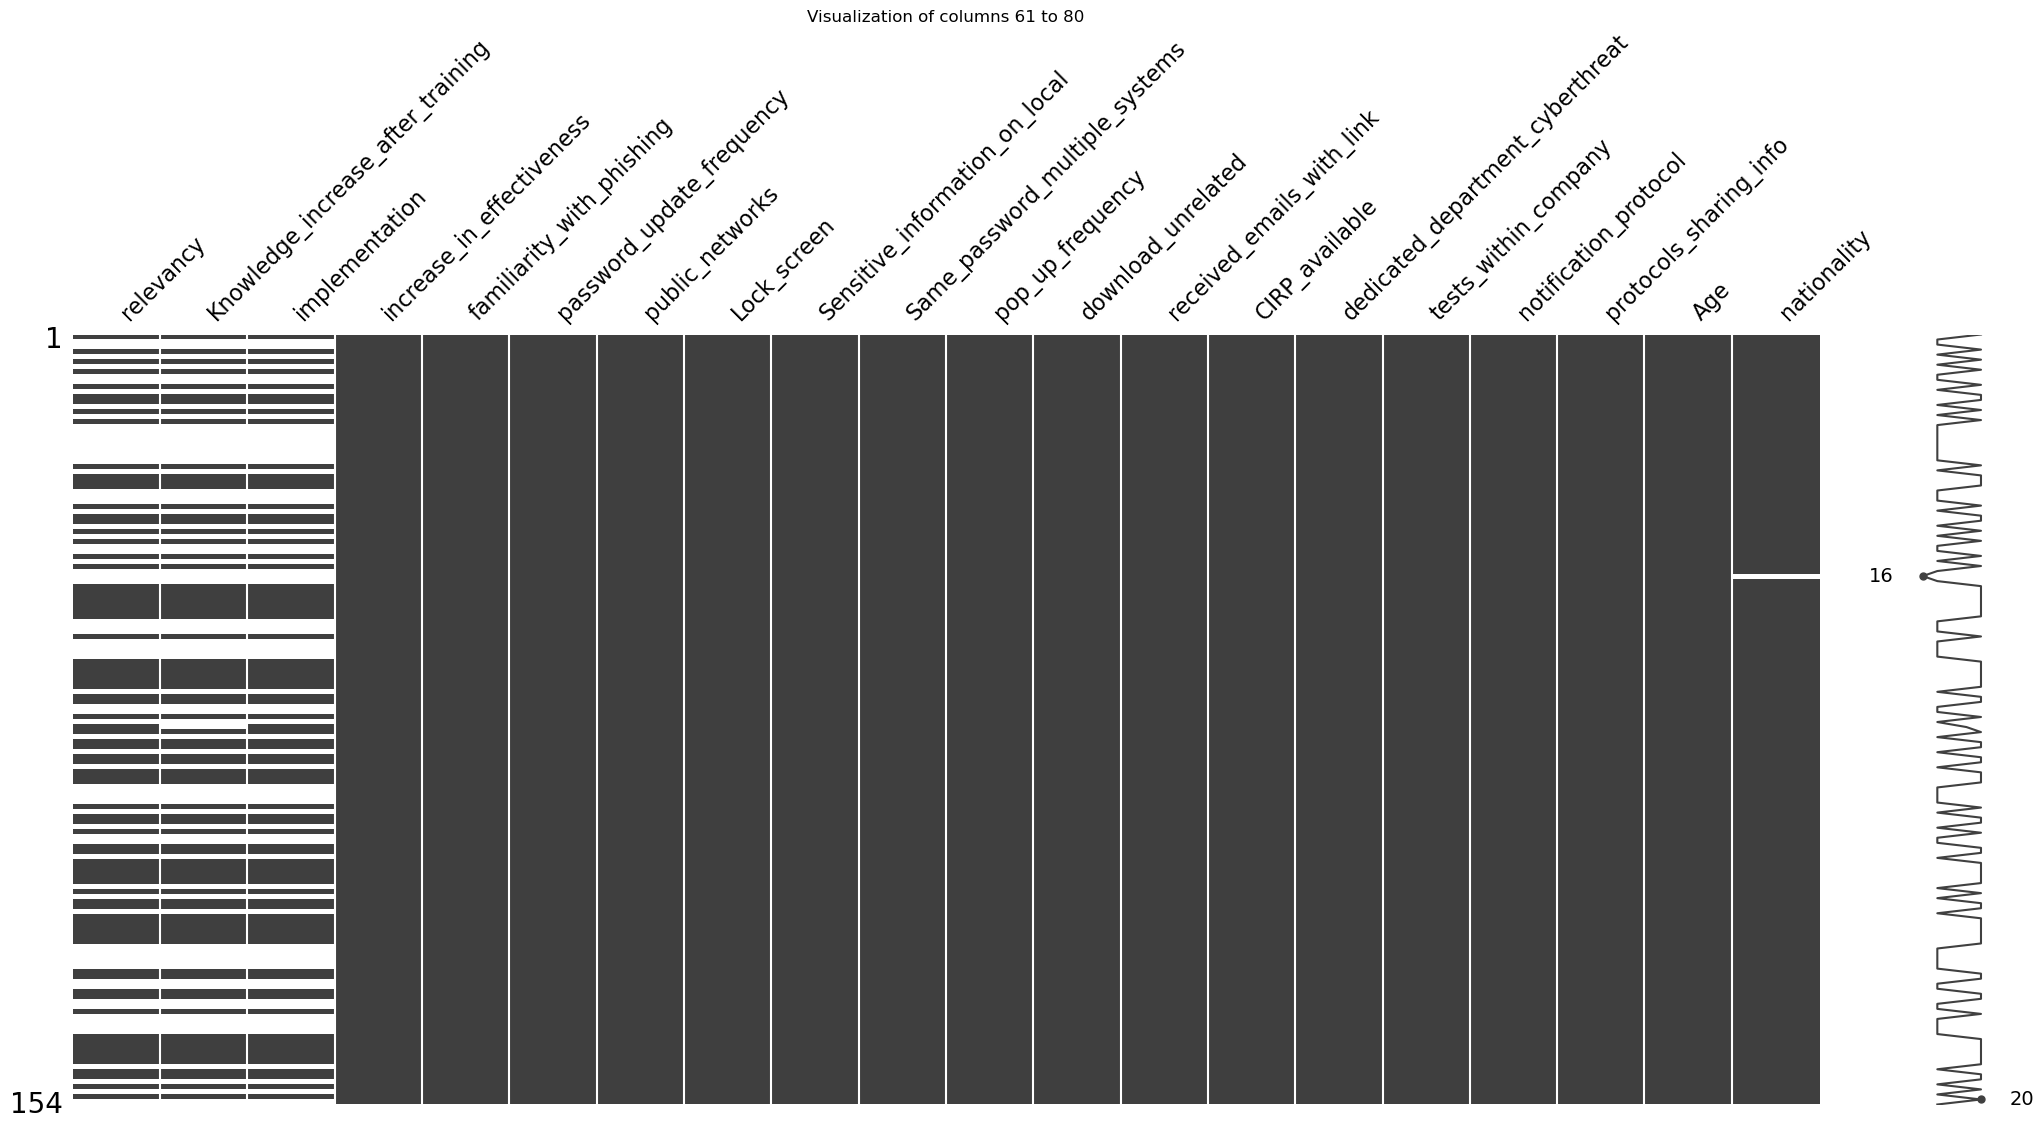

<Figure size 2000x800 with 0 Axes>

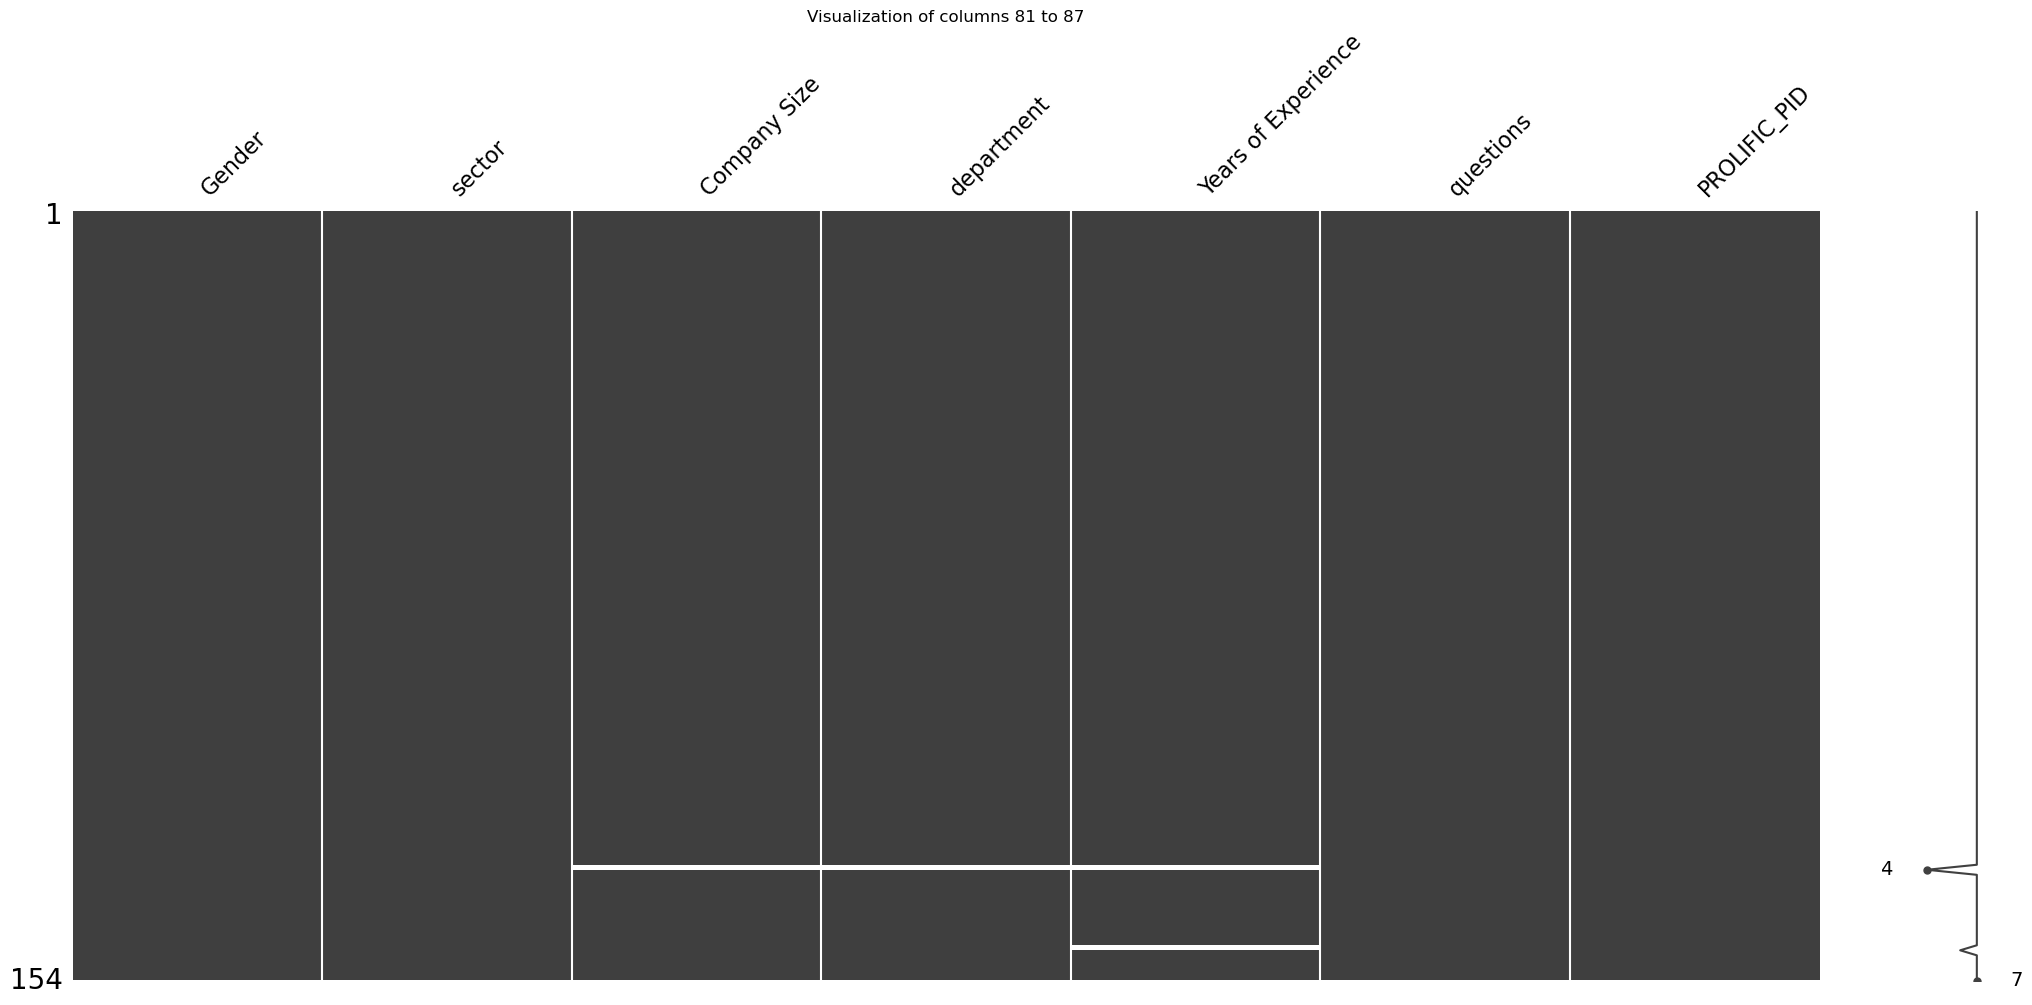

In [99]:
msno_matrix(df)

In [100]:
subset = df[df['sector'] == 'Hospitality']
subset

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,LocationLatitude,...,protocols_sharing_info,Age,nationality,Gender,sector,Company Size,department,Years of Experience,questions,PROLIFIC_PID
8,2024-09-30 16:19:47,2024-09-30 16:23:26,IP Address,89.168.128.54,100,218,True,2024-09-30 16:23:26,R_8jTcgOPzw3GYhu5,51.5494,...,No,20,British,Female,Hospitality,2024-01-10 00:00:00,Other,less than 1 year,5 - 10 years,66af99774c0c2849bca8e5b7
45,2024-09-30 16:19:41,2024-09-30 16:26:57,IP Address,173.35.128.80,100,435,True,2024-09-30 16:26:58,R_6kttB6Fa9zIoqyY,45.4147,...,No,30,Canadian,Male,Hospitality,2024-11-25 00:00:00,Sales & Marketing,3-5 years,3 - 5 years,5d9f4d5f3cac2b0016c79242
76,2024-09-30 16:21:18,2024-09-30 16:29:05,IP Address,82.47.195.104,100,467,True,2024-09-30 16:29:06,R_8xxHhIkub2qEJ8i,56.421,...,Yes,63,british,Female,Hospitality,2024-11-25 00:00:00,Customer Service & Support,more than 10 years,3 - 5 years,60461bfeeac81b04cf62f7a6
97,2024-09-30 16:21:13,2024-09-30 16:31:21,IP Address,99.233.58.168,100,608,True,2024-09-30 16:31:22,R_65T8UR4667cOZuz,44.4006,...,No,41,Canadian,Male,Hospitality,26-50,Other,more than 10 years,More than 20 years,66841640ece828f71e0d38d0
148,2024-09-30 16:19:09,2024-09-30 16:42:57,IP Address,102.219.169.252,100,1427,True,2024-09-30 16:42:57,R_2ERzOtFYma0llBE,-33.9258,...,I don't know,37,Zimbabwean,Female,Hospitality,26-50,Human Resources & Administration,5-10 years,10 - 20 years,6112e38f811a9d11384fd173


In [101]:
df.to_csv("cleaned_survey.csv")

with open("columns.pickle", "wb") as handle:
    pickle.dump(columns, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open("questions.pickle", "wb") as handle:
    pickle.dump(questions, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [103]:
# Example of loading a pickle
with open('columns.pickle', 'rb') as handle:
    b = pickle.load(handle)

print(b)

['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'InformedConsent', 'Prolific', 'Overall_knowledge', 'importance_role', 'industry_regulations', 'guidelines', 'awareness', 'measures', 'measures_11_TEXT', 'report_issue', 'Q4', 'review_policies', 'concern', 'Confidence', 'confident_prevent', 'knowledge', 'maintain_tools', 'rank_tools_1', 'rank_tools_2', 'rank_tools_3', 'rank_tools_4', 'rank_tools_5', 'antivirus_scans', 'Considerations', 'AI_in_cybersecurity', 'AI usage', 'ai_accuracy', 'Bias_security', 'wrong_identification', 'Worst_Outcome', 'Trust in AI', 'Review_frequency', 'location_policies', 'Consequences', 'Effectiveness', 'rank_steps_1', 'rank_steps_2', 'rank_steps_3', 'rank_steps_4', 'rank_steps_5', 'specialist', 'it_specialist_increase', 'it_specialist_solve', 'improvement_cybersecurity', 'training', 'follow_training', 'fre